In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### We have 5 datasets for 1 bedroom, 2 bedrooms, 3 bedrooms, 4 bedrooms, 5 bedrooms.
- First I will load each csv, drop irrelevant columns and average the price per year.

In [84]:
bhk_1= pd.read_csv("City_Zhvi_1bedroom.csv", index_col = 0)

#### Add a column "Beds" to denote the number of bedroom in a house

In [85]:
bhk_1['Beds'] = 1

#### Average prices per year

In [86]:
initialVal = 8
for i in range(1996, 2021):
    bhk_1[str(i)] = bhk_1.iloc[:, initialVal: initialVal+12].mean(axis = 1).round(0)
    initialVal = initialVal+12

#### Drop unwanted coloumns

In [87]:
bhk_1.drop([i for i in bhk_1.columns if '-' in i], axis = 1, inplace = True)

In [88]:
bhk_1

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,138767.0,...,415838.0,417489.0,440784.0,482286.0,532580.0,565166.0,594766.0,613355.0,605161.0,283797.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,113277.0,...,282015.0,277086.0,337208.0,380399.0,408002.0,445620.0,482102.0,525743.0,532550.0,241788.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,69134.0,...,62348.0,63665.0,69344.0,78113.0,87413.0,93737.0,97971.0,101363.0,105218.0,76385.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,96733.0,...,182226.0,170991.0,190468.0,209554.0,215737.0,224578.0,234568.0,239685.0,238917.0,154581.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,54815.0,...,57432.0,54678.0,56979.0,60629.0,65286.0,69527.0,76806.0,83224.0,90707.0,61103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14922,46631,29449,Mount Charleston,City,NV,NV,Las Vegas-Henderson-Paradise,Clark County,1,NaN,...,NaN,NaN,NaN,NaN,203716.0,211907.0,227834.0,255596.0,265272.0,205660.0
14923,36413,29449,Washington,City,CA,CA,Truckee-Grass Valley,Nevada County,1,NaN,...,NaN,NaN,NaN,NaN,180752.0,192271.0,231396.0,262920.0,262182.0,192778.0
14924,47188,29449,Poncha Springs,City,CO,CO,NaN,Chaffee County,1,NaN,...,203493.0,205260.0,210617.0,217037.0,236646.0,256527.0,281422.0,301018.0,318882.0,242772.0
14925,50522,29449,Oriskany Falls,City,NY,NY,Utica-Rome,Oneida County,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,92426.0,81997.0,84078.0,62850.0


In [89]:
bhk_1.columns[0:9]

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', 'Beds'],
      dtype='object')

#### Move the columns 1996, 1997...2020 into rows under columns name "Year" 

In [90]:
bhk_1 = bhk_1.melt(id_vars = bhk_1.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

#### Repeating the same steps for other 4 CSVs and merge them

In [91]:
bhk_2= pd.read_csv("City_Zhvi_2bedroom.csv",index_col = 0)

In [92]:
bhk_2['Beds'] = 2

In [93]:
bhk_2

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Beds
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,221378.0,220807.0,...,757140.0,755798.0,754176.0,752930.0,751581.0,750470.0,749923.0,749112.0,748076.0,2
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,160588.0,160470.0,...,630983.0,632244.0,634144.0,637111.0,639818.0,644225.0,649077.0,656189.0,663476.0,2
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,68930.0,68945.0,...,140043.0,140703.0,141259.0,142048.0,142366.0,142724.0,142883.0,143623.0,144587.0,2
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,106560.0,106422.0,...,231893.0,231898.0,231586.0,231307.0,231035.0,230780.0,230781.0,230826.0,231117.0,2
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,59783.0,59855.0,...,121916.0,122386.0,123370.0,124026.0,124762.0,124743.0,125185.0,125329.0,125778.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23391,52073,29449,Fort Montgomery,City,NY,NY,New York-Newark-Jersey City,Orange County,NaN,NaN,...,197946.0,200007.0,204227.0,207895.0,211743.0,212810.0,214751.0,215001.0,215191.0,2
23392,31730,29449,Gerlach,City,NV,NV,Reno,Washoe County,NaN,NaN,...,163001.0,164014.0,165600.0,167405.0,168617.0,169376.0,169220.0,167841.0,164301.0,2
23393,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,NaN,NaN,...,57037.0,57300.0,57463.0,57708.0,57828.0,58119.0,58116.0,58092.0,58124.0,2
23394,5133,29449,Hermitage,City,MO,MO,NaN,Hickory County,NaN,NaN,...,77991.0,78375.0,78344.0,78603.0,78894.0,79757.0,80651.0,81850.0,82846.0,2


In [94]:
initialVal = 8
for i in range(1996, 2021):
    bhk_2[str(i)] = bhk_2.iloc[:, initialVal: initialVal+12].mean(axis = 1).round(0)
    initialVal = initialVal+12


In [95]:
bhk_2.drop([i for i in bhk_2.columns if '-' in i], axis = 1, inplace = True)

In [96]:
bhk_2 = bhk_2.melt(id_vars = bhk_2.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

In [97]:
bhk_2

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,2,1996,219982.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,1996,159967.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2,1996,68815.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,2,1996,106893.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,2,1996,60410.0
...,...,...,...,...,...,...,...,...,...,...,...
584895,52073,29449,Fort Montgomery,City,NY,NY,New York-Newark-Jersey City,Orange County,2,2020,161236.0
584896,31730,29449,Gerlach,City,NV,NV,Reno,Washoe County,2,2020,125341.0
584897,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,2,2020,43584.0
584898,5133,29449,Hermitage,City,MO,MO,NaN,Hickory County,2,2020,61337.0


In [98]:
mergedDataSet = pd.concat([bhk_1, bhk_2])

In [99]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113277.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.0
...,...,...,...,...,...,...,...,...,...,...,...
584895,52073,29449,Fort Montgomery,City,NY,NY,New York-Newark-Jersey City,Orange County,2,2020,161236.0
584896,31730,29449,Gerlach,City,NV,NV,Reno,Washoe County,2,2020,125341.0
584897,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,2,2020,43584.0
584898,5133,29449,Hermitage,City,MO,MO,NaN,Hickory County,2,2020,61337.0


In [100]:
bhk_3= pd.read_csv("City_Zhvi_3bedroom.csv",index_col = 0)

In [101]:
bhk_3['Beds'] = 3

In [102]:
bhk_3

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Beds
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,206340.0,205765.0,...,669301.0,668754.0,667939.0,667235.0,666403.0,665999.0,665829.0,665469.0,664884.0,3
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,182221.0,182209.0,...,680905.0,682903.0,685596.0,689404.0,692833.0,698102.0,703865.0,712243.0,720780.0,3
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,84660.0,84790.0,...,172991.0,173649.0,174131.0,174780.0,175298.0,175883.0,176138.0,176669.0,177605.0,3
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,123550.0,123436.0,...,235933.0,235997.0,235715.0,235477.0,235328.0,235333.0,235600.0,236052.0,236676.0,3
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,86633.0,86602.0,...,172988.0,173547.0,174437.0,175060.0,175790.0,175967.0,176519.0,176722.0,177330.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25730,16604,29449,May,City,OK,OK,NaN,Harper County,NaN,NaN,...,76655.0,76851.0,77025.0,77337.0,77591.0,77854.0,77946.0,77827.0,77662.0,3
25731,27113,29449,Simpson,City,WV,WV,Clarksburg,Taylor County,NaN,NaN,...,75687.0,75762.0,75584.0,75355.0,75218.0,74912.0,74293.0,73847.0,73279.0,3
25732,29846,29449,Barwick,City,GA,GA,Valdosta,Brooks County,NaN,NaN,...,76773.0,76340.0,76607.0,77306.0,78105.0,77959.0,77957.0,78298.0,79450.0,3
25733,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,NaN,NaN,...,111908.0,112378.0,112785.0,113752.0,114610.0,115046.0,115260.0,115729.0,117070.0,3


In [103]:
initialVal = 8
for i in range(1996, 2021):
    bhk_3[str(i)] = bhk_3.iloc[:, initialVal: initialVal+12].mean(axis = 1).round(0)
    initialVal = initialVal+12

In [104]:
bhk_3.drop([i for i in bhk_3.columns if '-' in i], axis = 1, inplace = True)

In [105]:
bhk_3 = bhk_3.melt(id_vars = bhk_3.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

In [106]:
bhk_3

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,3,1996,204849.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,3,1996,182319.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,3,1996,85442.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,3,1996,123533.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,3,1996,86622.0
...,...,...,...,...,...,...,...,...,...,...,...
643370,16604,29449,May,City,OK,OK,NaN,Harper County,3,2020,58360.0
643371,27113,29449,Simpson,City,WV,WV,Clarksburg,Taylor County,3,2020,55356.0
643372,29846,29449,Barwick,City,GA,GA,Valdosta,Brooks County,3,2020,58927.0
643373,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,3,2020,87016.0


In [107]:
mergedDataSet = pd.concat([mergedDataSet, bhk_3])

In [108]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113277.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.0
...,...,...,...,...,...,...,...,...,...,...,...
643370,16604,29449,May,City,OK,OK,NaN,Harper County,3,2020,58360.0
643371,27113,29449,Simpson,City,WV,WV,Clarksburg,Taylor County,3,2020,55356.0
643372,29846,29449,Barwick,City,GA,GA,Valdosta,Brooks County,3,2020,58927.0
643373,51148,29449,Broad Top,City,PA,PA,Huntingdon,Huntingdon County,3,2020,87016.0


In [109]:
bhk_4= pd.read_csv("City_Zhvi_4bedroom.csv",index_col = 0)

In [110]:
bhk_4['Beds'] = 4

In [111]:
bhk_4

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Beds
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,233213.0,232632.0,...,811868.0,810783.0,809669.0,809085.0,807989.0,807780.0,807388.0,806795.0,805518.0,4
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,225449.0,225620.0,...,830215.0,832774.0,836060.0,840487.0,844371.0,850407.0,856403.0,865482.0,874732.0,4
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,132240.0,132208.0,...,234391.0,234813.0,235069.0,235604.0,236122.0,236717.0,236815.0,237271.0,238273.0,4
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,148277.0,148122.0,...,302479.0,302686.0,302717.0,302727.0,302718.0,302851.0,303337.0,304217.0,305303.0,4
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,140643.0,140525.0,...,248051.0,248583.0,249442.0,250020.0,250747.0,250791.0,251210.0,251167.0,251646.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,50926,29449,Beaver Bay,City,MN,MN,NaN,Lake County,NaN,NaN,...,235447.0,234458.0,234452.0,236101.0,236641.0,235954.0,233520.0,231665.0,229446.0,4
23459,21919,29449,Lake Park,City,GA,GA,Valdosta,Lowndes County,114749.0,115792.0,...,205882.0,205850.0,206057.0,206820.0,206680.0,206862.0,205536.0,205101.0,203280.0,4
23460,22166,29449,Haskins,City,OH,OH,Toledo,Wood County,NaN,NaN,...,209351.0,208369.0,209197.0,211379.0,215042.0,218303.0,220842.0,222658.0,225138.0,4
23461,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,NaN,NaN,...,330878.0,332777.0,332385.0,333127.0,333470.0,334726.0,336601.0,338190.0,340703.0,4


In [112]:
initialVal = 8
for i in range(1996, 2021):
    bhk_4[str(i)] = bhk_4.iloc[:, initialVal: initialVal+12].mean(axis = 1).round(0)
    initialVal = initialVal+12

In [113]:
bhk_4.drop([i for i in bhk_4.columns if '-' in i], axis = 1, inplace = True)

In [114]:
bhk_4 = bhk_4.melt(id_vars = bhk_4.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

In [115]:
mergedDataSet = pd.concat([mergedDataSet, bhk_4])

In [116]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113277.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.0
...,...,...,...,...,...,...,...,...,...,...,...
586570,50926,29449,Beaver Bay,City,MN,MN,NaN,Lake County,4,2020,173659.0
586571,21919,29449,Lake Park,City,GA,GA,Valdosta,Lowndes County,4,2020,149998.0
586572,22166,29449,Haskins,City,OH,OH,Toledo,Wood County,4,2020,166766.0
586573,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,4,2020,253874.0


In [117]:
bhk_5= pd.read_csv("City_Zhvi_5BedroomOrMore.csv",index_col = 0)

In [118]:
bhk_5['Beds'] = 5

In [119]:
bhk_5

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,Beds
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,258989.0,258283.0,...,1052158.0,1050936.0,1049761.0,1049042.0,1047797.0,1047948.0,1048209.0,1048544.0,1048050.0,5
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,419938.0,420685.0,...,1600091.0,1602572.0,1606059.0,1611326.0,1616454.0,1625317.0,1632646.0,1645434.0,1658508.0,5
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,241920.0,241541.0,...,400303.0,400679.0,400727.0,401211.0,401360.0,401643.0,401345.0,401709.0,402876.0,5
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,164589.0,164439.0,...,344225.0,344696.0,344855.0,345093.0,345215.0,345422.0,346043.0,347066.0,348428.0,5
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,203582.0,203338.0,...,332293.0,332731.0,333466.0,333994.0,334721.0,334730.0,335211.0,335103.0,335631.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18765,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,NaN,NaN,...,387901.0,389590.0,390555.0,392740.0,394341.0,396641.0,398649.0,400238.0,403231.0,5
18766,23268,29449,Port William,City,OH,OH,Wilmington,Clinton County,NaN,NaN,...,96834.0,95862.0,94489.0,93359.0,92528.0,91579.0,90059.0,87820.0,85300.0,5
18767,255141,29449,Bolivar,City,WV,WV,Washington-Arlington-Alexandria,Jefferson County,NaN,NaN,...,305652.0,306736.0,307736.0,308640.0,309440.0,310130.0,310708.0,311510.0,311726.0,5
18768,54589,29449,Strawberry Point,City,IA,IA,NaN,Clayton County,NaN,NaN,...,118453.0,118903.0,119267.0,119736.0,119871.0,120179.0,120198.0,120384.0,120536.0,5


In [120]:
initialVal = 8
for i in range(1996, 2021):
    bhk_5[str(i)] = bhk_5.iloc[:, initialVal: initialVal+12].mean(axis = 1).round(0)
    initialVal = initialVal+12

In [121]:
bhk_5.drop([i for i in bhk_5.columns if '-' in i], axis = 1, inplace = True)

In [122]:
bhk_5

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,5,259028.0,...,643754.0,643484.0,675651.0,738438.0,811685.0,883819.0,956275.0,1024789.0,1051666.0,498035.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,5,425536.0,...,1009250.0,1008093.0,1170036.0,1278604.0,1340959.0,1417881.0,1492097.0,1587744.0,1603799.0,804353.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,5,240446.0,...,292320.0,297018.0,323939.0,354740.0,382568.0,387351.0,389902.0,392974.0,400515.0,269186.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,5,164596.0,...,257675.0,244335.0,257613.0,272910.0,288436.0,308131.0,325577.0,338923.0,343956.0,226517.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,5,201949.0,...,255952.0,259534.0,269833.0,282969.0,294993.0,306523.0,316245.0,323766.0,332123.0,223592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18765,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,5,NaN,...,317948.0,312437.0,307924.0,327584.0,370452.0,382743.0,393506.0,395654.0,389834.0,300531.0
18766,23268,29449,Port William,City,OH,OH,Wilmington,Clinton County,5,NaN,...,NaN,NaN,NaN,NaN,88722.0,88560.0,95244.0,94043.0,94754.0,65796.0
18767,255141,29449,Bolivar,City,WV,WV,Washington-Arlington-Alexandria,Jefferson County,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294522.0,304498.0,233487.0
18768,54589,29449,Strawberry Point,City,IA,IA,NaN,Clayton County,5,NaN,...,88240.0,92422.0,95840.0,98750.0,98988.0,102550.0,107146.0,114636.0,118361.0,90281.0


In [123]:
bhk_5 = bhk_5.melt(id_vars = bhk_5.columns[0:9], 
        var_name = "Year", 
        value_name = "Average Price")

In [124]:
mergedDataSet = pd.concat([mergedDataSet, bhk_5],ignore_index = True)

In [128]:
mergedDataSet['Year'] = pd.to_numeric(mergedDataSet['Year'])

In [207]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113277.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.0
...,...,...,...,...,...,...,...,...,...,...,...
2657269,22166,29449,Haskins,City,OH,OH,Toledo,Wood County,5,2020,189558.0
2657270,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,5,2020,300531.0
2657271,23268,29449,Port William,City,OH,OH,Wilmington,Clinton County,5,2020,65796.0
2657272,255141,29449,Bolivar,City,WV,WV,Washington-Arlington-Alexandria,Jefferson County,5,2020,233487.0


#### Get the number of null values for each attribute

In [130]:
mergedDataSet.isnull().sum().sort_values()

RegionID              0
SizeRank              0
RegionName            0
RegionType            0
StateName             0
State                 0
CountyName            0
Beds                  0
Year                  0
Metro            602850
Average Price    768838
dtype: int64

#### Drop rows with null values

In [176]:
mergedDataSet=mergedDataSet.dropna()


In [177]:
mergedDataSet.isnull().sum().sort_values()

RegionID         0
SizeRank         0
RegionName       0
RegionType       0
StateName        0
State            0
Metro            0
CountyName       0
Beds             0
Year             0
Average Price    0
dtype: int64

In [178]:
mergedDataSet

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Beds,Year,Average Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,1,1996,138767.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1,1996,113277.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,1,1996,69134.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,1,1996,96733.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,1,1996,54815.0
...,...,...,...,...,...,...,...,...,...,...,...
2657269,22166,29449,Haskins,City,OH,OH,Toledo,Wood County,5,2020,189558.0
2657270,54096,29449,Reiles Acres,City,ND,ND,Fargo,Cass County,5,2020,300531.0
2657271,23268,29449,Port William,City,OH,OH,Wilmington,Clinton County,5,2020,65796.0
2657272,255141,29449,Bolivar,City,WV,WV,Washington-Arlington-Alexandria,Jefferson County,5,2020,233487.0


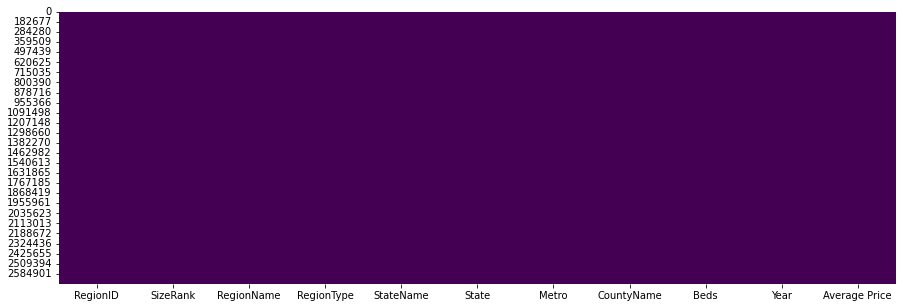

In [133]:
plt.subplots(figsize= (15,5))
sns.heatmap(mergedDataSet.isnull(), cbar= False, cmap= "viridis")
plt.show()

In [134]:
# plt.subplots(figsize= (20,10))
# plt.scatter(data= mergedDataSet, x= "Average Price", y= "Beds")
# plt.xlabel('Average Price')
# plt.ylabel('Beds')
# plt.show()

In [135]:
# mergedDataSet.plot.bar()

## New York City average price/ beds by year.

In [159]:
Dataset_NY = mergedDataSet.loc[(mergedDataSet['CountyName'] == 'Queens County')]


In [160]:
Dataset_NY = Dataset_NY[['Average Price', 'Year', 'Beds']]

<AxesSubplot:xlabel='Year', ylabel='Average Price'>

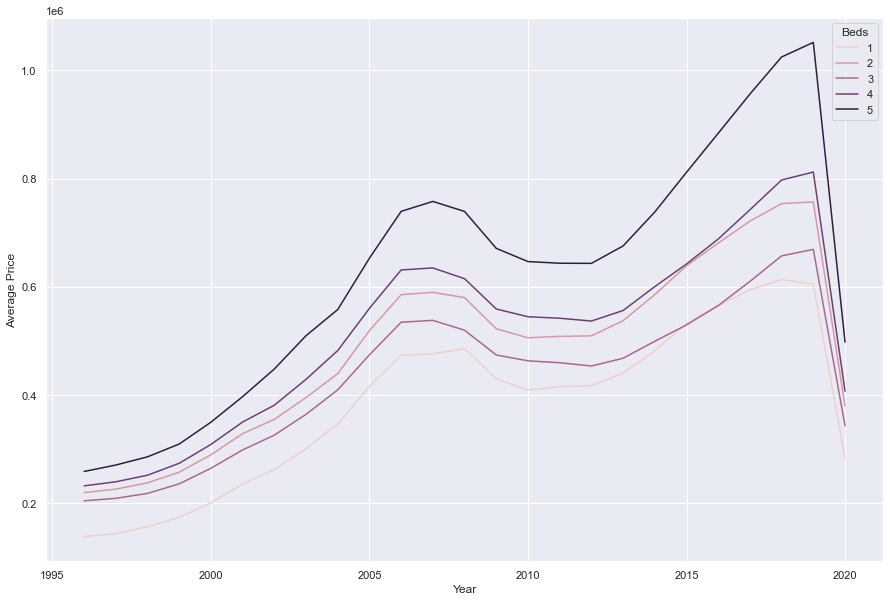

In [161]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x=Dataset_NY['Year'], y= Dataset_NY['Average Price'], hue = Dataset_NY['Beds'])

## top five cities with highest average by year

In [173]:
top_5_states=mergedDataSet.groupby(['Beds','State']).mean().sort_values('Average Price',ascending = False).head(5)

<AxesSubplot:xlabel='Beds,State'>

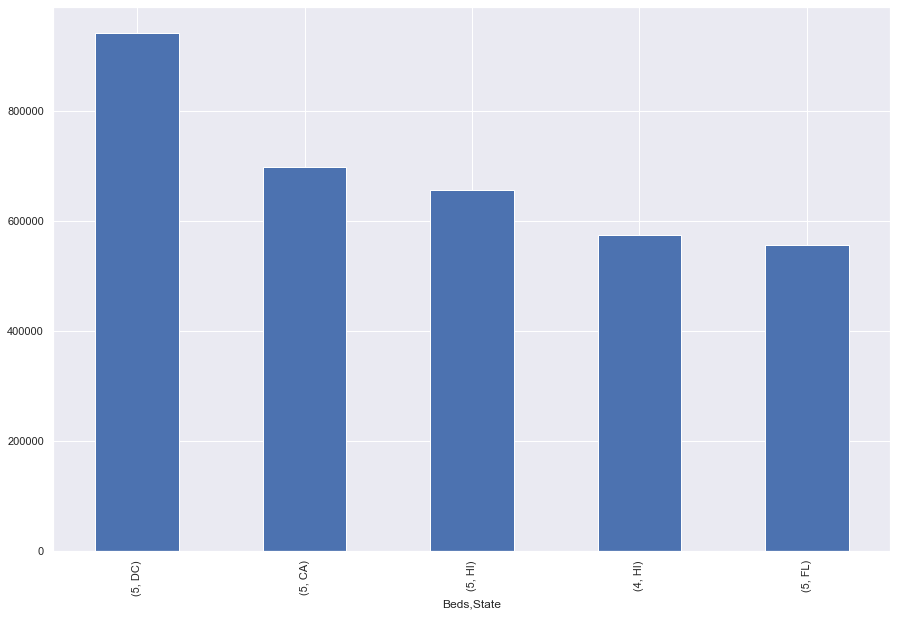

In [206]:
top_5_states['Average Price'].plot.bar()

## top five cities with highest growth rate

In [196]:
growth_df.columns

MultiIndex([('Average Price', 1996),
            ('Average Price', 2020)],
           names=[None, 'Year'])

In [198]:
temp_df = mergedDataSet[(mergedDataSet['Year'] == 1996) | (mergedDataSet['Year'] == 2020)]
growth_df = temp_df.groupby(["State","Year"]).mean()[['Average Price']].unstack()

growth_df['growth rate'] = ((growth_df[('Average Price', 2020)] - growth_df[('Average Price', 1996)])/growth_df[('Average Price', 1996)])*100

growth_df = growth_df[['growth rate']]

<AxesSubplot:xlabel='State'>

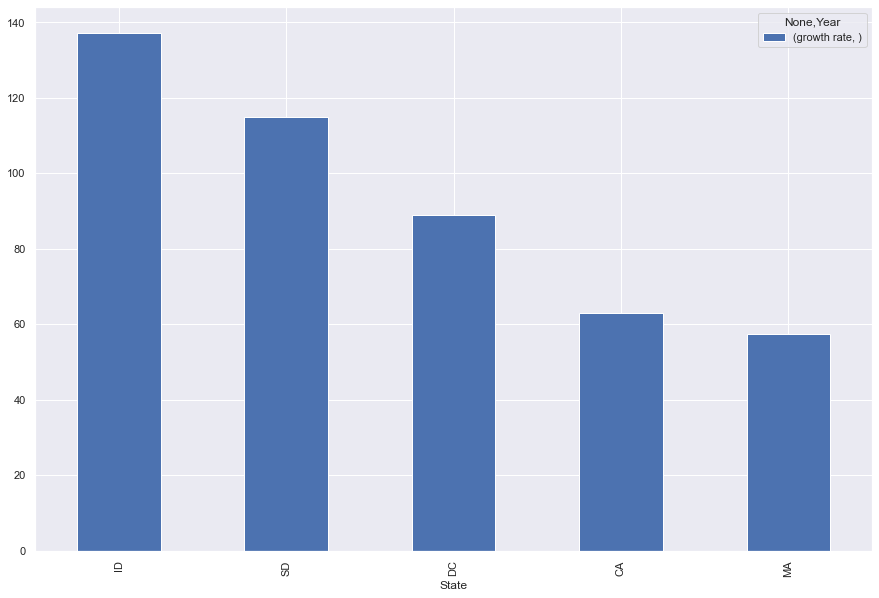

In [205]:
growth_df.sort_values('growth rate', ascending = False).head(5).plot.bar()

The state ID had the highest growth rate from 1996 to 2020 with growth rate of 137%.